In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow_addons as tfa
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Activation, MaxPooling2D, Flatten


# data_path = "../moa_data/"

# alternative, use google colab and google drive
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/MoA/lish-moa/"


train_features_y1 = pd.read_csv(data_path + "train_targets_scored.csv")
train_features1 = pd.read_csv(data_path + "train_features.csv")

test_features1 = pd.read_csv(data_path + "test_features.csv")

sample1 = pd.read_csv(data_path + "sample_submission.csv")
test_features1.describe()


train_features_y1 = train_features_y1.drop("sig_id", axis= 1)
train_features1= np.array(train_features1)

test_features1= np.array(test_features1)

train_features_y1= np.array(train_features_y1)
le = LabelEncoder()

train_features1[:, 0] = le.fit_transform(train_features1[:, 0])
test_features1[:, 0] = le.fit_transform(test_features1[:, 0])

train_features1[:, 1] = le.fit_transform(train_features1[:, 1])
train_features1[:, 3] = le.fit_transform(train_features1[:, 3])
test_features1[:, 1] = le.fit_transform(test_features1[:, 1])
test_features1[:, 3] = le.fit_transform(test_features1[:, 3])


train_features_y1  = np.asarray(train_features_y1).astype('float32')
train_features1  = np.asarray(train_features1).astype('float32')
test_features1  = np.asarray(test_features1).astype('float32')
train_features_y1  = tf.keras.utils.normalize(train_features_y1, axis=-1, order=2)
train_features1 = tf.keras.utils.normalize(train_features1, axis=-1, order=2)
test_features1 = tf.keras.utils.normalize(test_features1, axis=-1, order=2)

X_train, X_test, y_train, y_test = train_test_split(train_features1, train_features_y1, test_size = 0.01, random_state = 101)

def auc(y_test, y_train):
    return tf.py_function(roc_auc_score, (y_test, y_train), tf.double)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


737/737 [==============================] - 4s 6ms/step - loss: 0.0244 - auc_5: 0.6905
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 876)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 480)               420960    
_________________________________________________________________
dense_33 (Dense)             (None, 480)               230880    
_________________________________________________________________
dense_34 (Dense)             (None, 480)               230880    
_________________________________________________________________
dense_35 (Dense)             (None, 480)               230880    
_________________________________________________________________
last_frozen (Dense)          (None, 480)               230880    
__________________________________

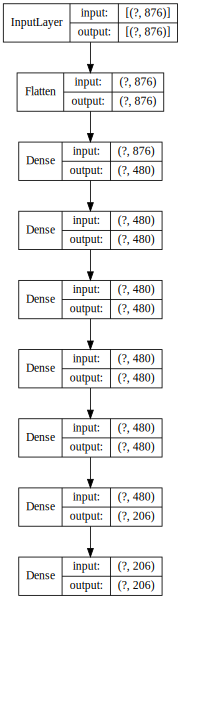

In [16]:
       
model = tf.keras.models.Sequential()
model.add(Flatten())

tf.keras.layers.BatchNormalization 
model.add(tf.keras.layers.Dense(480, activation="relu")) 
tf.keras.layers.BatchNormalization  
tf.keras.layers.Dropout(0.20) 
model.add(tf.keras.layers.Dense(480, activation="relu"))  
tf.keras.layers.BatchNormalization
tf.keras.layers.Dropout(0.20)
model.add(tf.keras.layers.Dense(480, activation="relu")) 
tf.keras.layers.BatchNormalization
model.add(tf.keras.layers.Dense(480, activation="relu")) 
tf.keras.layers.BatchNormalization
tf.keras.layers.Dropout(0.20)
model.add(tf.keras.layers.Dense(480, kernel_initializer='lecun_normal', activation='selu', name = 'last_frozen' ))
tf.keras.layers.BatchNormalization
model.add(tf.keras.layers.Dense(206, kernel_initializer='lecun_normal', activation='selu'))
tf.keras.layers.BatchNormalization  
model.add(tf.keras.layers.Dense(206, activation="sigmoid"))
        

Epoch 1/39
737/737 [==============================] - 4s 6ms/step - loss: 0.0195 - auc_5: 0.7120
Epoch 2/39
737/737 [==============================] - 4s 6ms/step - loss: 0.0187 - auc_5: 0.7291
Epoch 3/39
737/737 [==============================] - 4s 5ms/step - loss: 0.0184 - auc_5: 0.7399
Epoch 4/39
737/737 [==============================] - 4s 6ms/step - loss: 0.0181 - auc_5: 0.7455
Epoch 5/39
737/737 [==============================] - 4s 6ms/step - loss: 0.0180 - auc_5: 0.7498
Epoch 6/39
737/737 [==============================] - 4s 6ms/step - loss: 0.0178 - auc_5: 0.7530
Epoch 7/39
737/737 [==============================] - 4s 6ms/step - loss: 0.0176 - auc_5: 0.7561
Epoch 8/39
737/737 [==============================] - 4s 5ms/step - loss: 0.0174 - auc_5: 0.7605
Epoch 9/39
737/737 [==============================] - 4s 6ms/step - loss: 0.0172 - auc_5: 0.7632
Epoch 10/39
737/737 [==============================] - 5s 6ms/step - loss: 0.0171 - auc_5: 0.7676
Epoch 11/39
737/737 [========

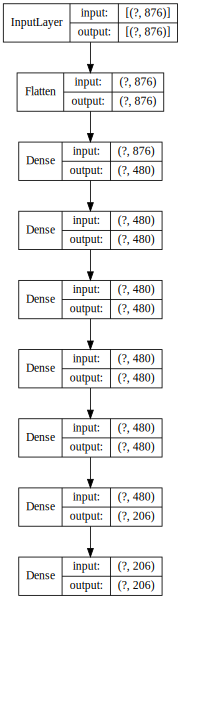

In [17]:

model.fit(X_train, y_train, epochs=39)

val_loss, val_acc = model.evaluate(X_test, y_test)

print("loss "+ str(val_loss))
print("accuracy "+ str(val_acc))
predictions = model.predict(test_features1)
predictions = np.clip(predictions, a_min = 0.001, a_max = 0.999)
predictions = pd.DataFrame(predictions)
predictions.head(10)
target_name = ['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor', 'acat_inhibitor', 'acetylcholine_receptor_agonist', 'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor', 'adenosine_receptor_agonist', 'adenosine_receptor_antagonist', 'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist', 'adrenergic_receptor_antagonist', 'akt_inhibitor', 'aldehyde_dehydrogenase_inhibitor', 'alk_inhibitor', 'ampk_activator', 'analgesic', 'androgen_receptor_agonist', 'androgen_receptor_antagonist', 'anesthetic_-_local', 'angiogenesis_inhibitor', 'angiotensin_receptor_antagonist', 'anti-inflammatory', 'antiarrhythmic', 'antibiotic', 'anticonvulsant', 'antifungal', 'antihistamine', 'antimalarial', 'antioxidant', 'antiprotozoal', 'antiviral', 'apoptosis_stimulant', 'aromatase_inhibitor', 'atm_kinase_inhibitor', 'atp-sensitive_potassium_channel_antagonist', 'atp_synthase_inhibitor', 'atpase_inhibitor', 'atr_kinase_inhibitor', 'aurora_kinase_inhibitor', 'autotaxin_inhibitor', 'bacterial_30s_ribosomal_subunit_inhibitor', 'bacterial_50s_ribosomal_subunit_inhibitor', 'bacterial_antifolate', 'bacterial_cell_wall_synthesis_inhibitor', 'bacterial_dna_gyrase_inhibitor', 'bacterial_dna_inhibitor', 'bacterial_membrane_integrity_inhibitor', 'bcl_inhibitor', 'bcr-abl_inhibitor', 'benzodiazepine_receptor_agonist', 'beta_amyloid_inhibitor', 'bromodomain_inhibitor', 'btk_inhibitor', 'calcineurin_inhibitor', 'calcium_channel_blocker', 'cannabinoid_receptor_agonist', 'cannabinoid_receptor_antagonist', 'carbonic_anhydrase_inhibitor', 'casein_kinase_inhibitor', 'caspase_activator', 'catechol_o_methyltransferase_inhibitor', 'cc_chemokine_receptor_antagonist', 'cck_receptor_antagonist', 'cdk_inhibitor', 'chelating_agent', 'chk_inhibitor', 'chloride_channel_blocker', 'cholesterol_inhibitor', 'cholinergic_receptor_antagonist', 'coagulation_factor_inhibitor', 'corticosteroid_agonist', 'cyclooxygenase_inhibitor', 'cytochrome_p450_inhibitor', 'dihydrofolate_reductase_inhibitor', 'dipeptidyl_peptidase_inhibitor', 'diuretic', 'dna_alkylating_agent', 'dna_inhibitor', 'dopamine_receptor_agonist', 'dopamine_receptor_antagonist', 'egfr_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'estrogen_receptor_agonist', 'estrogen_receptor_antagonist', 'faah_inhibitor', 'farnesyltransferase_inhibitor', 'fatty_acid_receptor_agonist', 'fgfr_inhibitor', 'flt3_inhibitor', 'focal_adhesion_kinase_inhibitor', 'free_radical_scavenger', 'fungal_squalene_epoxidase_inhibitor', 'gaba_receptor_agonist', 'gaba_receptor_antagonist', 'gamma_secretase_inhibitor', 'glucocorticoid_receptor_agonist', 'glutamate_inhibitor', 'glutamate_receptor_agonist', 'glutamate_receptor_antagonist', 'gonadotropin_receptor_agonist', 'gsk_inhibitor', 'hcv_inhibitor', 'hdac_inhibitor', 'histamine_receptor_agonist', 'histamine_receptor_antagonist', 'histone_lysine_demethylase_inhibitor', 'histone_lysine_methyltransferase_inhibitor', 'hiv_inhibitor', 'hmgcr_inhibitor', 'hsp_inhibitor', 'igf-1_inhibitor', 'ikk_inhibitor', 'imidazoline_receptor_agonist', 'immunosuppressant', 'insulin_secretagogue', 'insulin_sensitizer', 'integrin_inhibitor', 'jak_inhibitor', 'kit_inhibitor', 'laxative', 'leukotriene_inhibitor', 'leukotriene_receptor_antagonist', 'lipase_inhibitor', 'lipoxygenase_inhibitor', 'lxr_agonist', 'mdm_inhibitor', 'mek_inhibitor', 'membrane_integrity_inhibitor', 'mineralocorticoid_receptor_antagonist', 'monoacylglycerol_lipase_inhibitor', 'monoamine_oxidase_inhibitor', 'monopolar_spindle_1_kinase_inhibitor', 'mtor_inhibitor', 'mucolytic_agent', 'neuropeptide_receptor_antagonist', 'nfkb_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_donor', 'nitric_oxide_production_inhibitor', 'nitric_oxide_synthase_inhibitor', 'norepinephrine_reuptake_inhibitor', 'nrf2_activator', 'opioid_receptor_agonist', 'opioid_receptor_antagonist', 'orexin_receptor_antagonist', 'p38_mapk_inhibitor', 'p-glycoprotein_inhibitor', 'parp_inhibitor', 'pdgfr_inhibitor', 'pdk_inhibitor', 'phosphodiesterase_inhibitor', 'phospholipase_inhibitor', 'pi3k_inhibitor', 'pkc_inhibitor', 'potassium_channel_activator', 'potassium_channel_antagonist', 'ppar_receptor_agonist', 'ppar_receptor_antagonist', 'progesterone_receptor_agonist', 'progesterone_receptor_antagonist', 'prostaglandin_inhibitor', 'prostanoid_receptor_antagonist', 'proteasome_inhibitor', 'protein_kinase_inhibitor', 'protein_phosphatase_inhibitor', 'protein_synthesis_inhibitor', 'protein_tyrosine_kinase_inhibitor', 'radiopaque_medium', 'raf_inhibitor', 'ras_gtpase_inhibitor', 'retinoid_receptor_agonist', 'retinoid_receptor_antagonist', 'rho_associated_kinase_inhibitor', 'ribonucleoside_reductase_inhibitor', 'rna_polymerase_inhibitor', 'serotonin_receptor_agonist', 'serotonin_receptor_antagonist', 'serotonin_reuptake_inhibitor', 'sigma_receptor_agonist', 'sigma_receptor_antagonist', 'smoothened_receptor_antagonist', 'sodium_channel_inhibitor', 'sphingosine_receptor_agonist', 'src_inhibitor', 'steroid', 'syk_inhibitor', 'tachykinin_antagonist', 'tgf-beta_receptor_inhibitor', 'thrombin_inhibitor', 'thymidylate_synthase_inhibitor', 'tlr_agonist', 'tlr_antagonist', 'tnf_inhibitor', 'topoisomerase_inhibitor', 'transient_receptor_potential_channel_antagonist', 'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist', 'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor', 'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b', 'vitamin_d_receptor_agonist', 'wnt_inhibitor']
predictions.columns=target_name

sample2 = pd.DataFrame(sample1["sig_id"])
sample2
predictions.insert(0, "sig_id", sample2, True)

predictions.head(10)
predictions.to_csv('new_submission.csv', index = False)
predictions.shape
predictions = pd.DataFrame(predictions)


model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB', dpi=60).create(prog='dot', format='svg'))